# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [60]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [61]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [62]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

**Fetching Movie URL**

In [63]:
 #Write Your Code here
#Hint : Use the following code to extract the film urls
movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]
url_list=[]
for x in movie_urls:
  url_list.append('https://www.justwatch.com'+x)
print(url_list)
#for x in url_list:
  #print(x)

['https://www.justwatch.com/in/movie/pushpa-the-rule-part-2', 'https://www.justwatch.com/in/movie/marco-2024', 'https://www.justwatch.com/in/movie/game-changer-2023', 'https://www.justwatch.com/in/movie/sanam-teri-kasam', 'https://www.justwatch.com/in/movie/identity-2025', 'https://www.justwatch.com/in/movie/sookshma-darshini', 'https://www.justwatch.com/in/movie/venom-3-2024', 'https://www.justwatch.com/in/movie/stree-2', 'https://www.justwatch.com/in/movie/365-days', 'https://www.justwatch.com/in/movie/viduthalai-part-2', 'https://www.justwatch.com/in/movie/pani', 'https://www.justwatch.com/in/movie/the-substance', 'https://www.justwatch.com/in/movie/untitled-murad-khetani-varun-dhawan-project', 'https://www.justwatch.com/in/movie/lucky-baskhar', 'https://www.justwatch.com/in/movie/mufasa-the-lion-king', 'https://www.justwatch.com/in/movie/anora', 'https://www.justwatch.com/in/movie/babygirl-2024', 'https://www.justwatch.com/in/movie/sky-force', 'https://www.justwatch.com/in/movie/al

## **Scrapping Movie Title**

In [64]:
 #Write Your Code here
movie_titles = []
for url in url_list:                                      #This loop iterates over each url in the list url_list
    soup = fetch_movie_urls(url)                          #Fetch the Webpage Content
    if soup:                                              #Check if Fetching Was Successful
        title_element = soup.find('h1', class_="title-detail-hero__details__title")   #Locate the Title Element
        if title_element:                                                             # Check if Title Element Was Found
          movie_titles.append(title_element.text.strip())
        else:
          movie_titles.append("Title not found")        # Handle Missing Title Element
    else:
        movie_titles.append("Failed to fetch URL")      #Handle Fetch Failure
print(movie_titles)

['Pushpa: The Rule - Part 2 (2024)', 'Marco (2024)', 'Game Changer (2025)', 'Sanam Teri Kasam (2016)', 'Identity (2025)', 'Sookshma Darshini (2024)', 'Venom: The Last Dance (2024)', 'Stree 2: Sarkate Ka Aatank (2024)', '365 Days (2020)', 'Viduthalai Part 2 (2024)', 'Pani (2024)', 'The Substance (2024)', 'Baby John (2024)', 'Lucky Baskhar (2024)', 'Mufasa: The Lion King (2024)', 'Anora (2024)', 'Babygirl (2024)', 'Sky Force (2025)', 'All We Imagine as Light (2024)', 'Pushpa: The Rise - Part 1 (2021)', 'Hisaab Barabar (2024)', 'Rifle Club (2024)', 'Kraven the Hunter (2024)', 'Solo Leveling -ReAwakening- (2024)', 'Bhool Bhulaiyaa 3 (2024)', 'The Wild Robot (2024)', 'Deva (2025)', 'Singham Again (2024)', 'Mrs. (2023)', 'Interstellar (2014)', 'Daaku Maharaaj (2025)', 'Nosferatu (2024)', 'Back in Action (2025)', 'The Sabarmati Report (2024)', 'Culpa Tuya (2024)', 'Rekhachithram (2025)', 'Sonic the Hedgehog 3 (2024)', 'Blink Twice (2024)', 'Viduthalai: Part I (2023)', 'UI (2024)', 'Tabaah (20

## **Scrapping release Year**

In [65]:
#Write Your Code here
release_years = []
for url in url_list:
    soup = fetch_movie_urls(url)
    if soup:
        year_element = soup.find('span', class_="release-year") #This is a guess, inspect the webpage to find the correct class or id
        if year_element:
            year_match = re.search(r'\b(19|20)\d{2}\b', year_element.text)   # Extract the year using regular expression (more robust)
            if year_match:
                release_years.append(int(year_match.group(0)))
            else:
                release_years.append(None)  # Handle cases where the year isn't found in the expected format
        else:
            release_years.append(None) # Handle cases where the year element isn't found
    else:
        release_years.append(None) #Handle fetch failure

print(release_years)

[2024, 2024, 2025, 2016, 2025, 2024, 2024, 2024, 2020, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2025, 2024, 2021, 2024, 2024, 2024, 2024, 2024, 2024, 2025, 2024, 2023, 2014, 2025, 2024, 2025, 2024, 2024, 2025, 2024, 2024, 2023, 2024, 2024, 2024, 2015, 2025, 2019, 2019, 2024, 2013, 2024, 2024, 2024, 2024, 2018, 2023, 2015, 2024, 2024, 2022, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2021, 2024, 2024, 2023, 2024, 2023, 2018, 2024, 2025, 2024, 2024, 2024, 2024, 2013, 2024, 2024, 2024, 2024, 2001, 2024, 2024, 2024, 2025, 2024, 2013, 2024, 2024, 2023, 2025, 2018, 2019, 2009, 2008, 2019, 2024, 2024, 2025, 2016, 2025, 2024, 2025, 2025, 2024, 2024]


## **Scrapping Genres**

In [66]:
genres_list = []                                      # Initialize an empty list to store the extracted genres

for url in url_list:                                   # Iterate through each movie URL in the list
    soup = fetch_movie_urls(url)                       # Fetch and parse the HTML content of the movie page

    if soup:                                          # Check if the parsing was successful (soup object exists)
                                                      # Find the 'h3' tag with the class 'poster-detail-infos__subheading' and the text 'Genres'
        h3_element = soup.find('h3', class_='poster-detail-infos__subheading', string='Genres')

        if h3_element:                                       # Check if the 'h3' tag for Genres was found
                                                             # Find the next sibling div with the class 'poster-detail-infos__value'
            div_element = h3_element.find_next_sibling('div', class_='poster-detail-infos__value')

            if div_element:                                   # Check if the div containing the genres was found
                genres_list.append(div_element.text.strip())  # Extract and append the genres to the list
            else:
                genres_list.append("Genre Not Listed")        # Handle cases where the genres div is not found
        else:
            genres_list.append("Genre Not Listed")            # Handle cases where the 'h3' tag for Genres is not found
    else:
        genres_list.append("Genre Not Listed")                # Handle cases where the soup object is not created

print(genres_list)                                                 # Print the list of extracted genres

['Action & Adventure, Crime, Drama, Mystery & Thriller', 'Action & Adventure, Crime, Mystery & Thriller', 'Action & Adventure, Drama, Mystery & Thriller', 'Drama, Romance', 'Mystery & Thriller, Action & Adventure, Crime', 'Mystery & Thriller, Comedy', 'Action & Adventure, Science-Fiction, Mystery & Thriller', 'Comedy, Horror', 'Drama, Romance, Made in Europe', 'Drama, Mystery & Thriller, Action & Adventure, Crime', 'Crime, Action & Adventure, Drama, Mystery & Thriller', 'Horror, Science-Fiction, Drama', 'Action & Adventure, Drama, Mystery & Thriller, Crime', 'Crime, Drama, Mystery & Thriller', 'Drama, Kids & Family, Fantasy, Animation, Action & Adventure', 'Comedy, Drama, Romance', 'Drama, Romance, Mystery & Thriller, Crime', 'Action & Adventure, Mystery & Thriller', 'Drama, Romance', 'Mystery & Thriller, Action & Adventure, Drama, Crime', 'Drama, Mystery & Thriller, Comedy', 'Action & Adventure, Mystery & Thriller', 'Action & Adventure, Mystery & Thriller', 'Action & Adventure, Fantas

## **Scrapping IMBD Rating**

In [67]:
imdb_ratings = []                                 # Initialize an empty list to store the extracted IMDb ratings

for url in url_list:                              # Iterate through each movie URL in the provided list
    soup = fetch_movie_urls(url)                  # Fetch and parse the HTML content of the movie page (assuming a function named fetch_movie_urls exists)

    if soup:                                      # Check if fetching and parsing were successful (soup object exists)
                                                  # Find the element containing the IMDb rating using its class (replace 'imdb-score' if necessary)
        imdb_element = soup.find('span', class_='imdb-score')

        if imdb_element:                             # Check if the IMDb rating element was found
            rating_text = imdb_element.text.strip()  # Extract the text content and remove leading/trailing whitespace

            try:
                                                      # Attempt to convert the rating text to a float using regular expression
                rating = float(re.search(r"[\d.]+", rating_text).group(0))
                imdb_ratings.append(rating)           # Append the extracted float rating to the list
            except (AttributeError, ValueError):      # Handle cases where the search fails (AttributeError) or conversion fails (ValueError)
                imdb_ratings.append(None)             # Append None to the list in case of errors

        else:                                         # If the IMDb rating element is not found, append None to the list
            imdb_ratings.append(None)

    else:                                             # If fetching/parsing failed (soup is None), append None to the list
        imdb_ratings.append(None)

print(imdb_ratings)                                   # Print the final list of extracted IMDb ratings

[6.2, 7.4, 5.8, 7.6, 7.8, 7.8, 6.0, 6.9, 3.3, 8.1, 6.9, 7.3, 5.9, 8.0, 6.7, 7.7, 6.1, 7.4, 7.1, 7.6, 5.7, 7.0, 5.4, 8.5, 4.7, 8.2, 7.7, 4.9, 7.2, 8.7, 6.4, 7.3, 5.9, 6.5, 5.2, 8.6, 7.0, 6.5, 8.3, 7.1, 5.7, 8.2, 4.2, 7.4, 7.0, 7.1, 6.7, 7.7, 6.8, 7.9, 8.2, 6.6, 8.2, 6.6, 5.9, 5.7, 7.2, 8.2, 4.6, 7.6, 7.0, 7.4, 6.8, 7.3, 7.7, 7.5, 5.7, 7.6, 8.5, 6.1, 6.7, 6.7, 8.2, 7.1, 9.1, 7.6, 5.4, 7.2, 7.0, 8.2, 8.5, 7.9, 8.0, 5.5, 7.7, 3.4, 3.7, 9.0, 6.4, 6.7, 7.9, 5.4, 6.4, 5.0, 5.1, 7.3, 8.2, 6.9, 7.6, 7.0, 6.2, 7.4, 5.8, 7.6, 7.8, 7.3, None, None, 3.7, 7.7]


## **Scrapping Runtime/Duration**

In [68]:
# Write Your Code here
Runtime_Duration = []                                                   # Initialize an empty list to store the extracted runtimes

for url in url_list:                                                    # Iterate through each movie URL in the list
    soup = fetch_movie_urls(url)                                        # Fetch and parse the HTML content of the movie page

    if soup:                                                            # Check if the parsing was successful (soup object exists)
                                                                        # Find the 'h3' tag with the class 'poster-detail-infos__subheading' and the text 'Runtime'
        h3_element = soup.find('h3', class_='poster-detail-infos__subheading', string='Runtime')

        if h3_element:                                        # Check if the 'h3' tag for Runtime was found
                                                              # Find the next sibling div with the class 'poster-detail-infos__value'
            div_element = h3_element.find_next_sibling('div', class_='poster-detail-infos__value')

            if div_element:                                        # Check if the div containing the runtime was found
                Runtime_Duration.append(div_element.text.strip())  # Extract and append the runtime to the list
            else:
                Runtime_Duration.append("Runtime Not Listed")      # Handle cases where the runtime div is not found
        else:
            Runtime_Duration.append("Runtime Not Listed")          # Handle cases where the 'h3' tag for Runtime is not found
    else:
        Runtime_Duration.append("Runtime Not Listed")              # Handle cases where the soup object is not created

print(Runtime_Duration)                                            # Print the list of extracted runtimes


['3h 21min', '2h 25min', '2h 44min', '2h 34min', '2h 37min', '2h 22min', '1h 49min', '2h 27min', '1h 54min', '2h 30min', '2h 23min', '2h 21min', '2h 42min', '2h 28min', '1h 58min', '2h 19min', '1h 54min', '2h 5min', '1h 58min', '2h 59min', '1h 52min', '1h 53min', '2h 7min', '1h 56min', '2h 38min', '1h 42min', '2h 33min', '2h 25min', '1h 51min', '2h 49min', '2h 30min', '2h 13min', '1h 54min', '2h 7min', '1h 58min', '2h 27min', '1h 50min', '1h 43min', '2h 26min', '2h 12min', '1h 48min', '2h 29min', '2h 5min', '2h 7min', '1h 50min', '2h 56min', '2h 14min', '3h 0min', '1h 39min', '3h 35min', '2h 47min', '2h 28min', '2h 10min', '2h 55min', '1h 16min', '1h 44min', '2h 3min', '2h 46min', '2h 34min', '2h 7min', '1h 51min', '2h 0min', '1h 56min', '1h 56min', '2h 12min', '1h 45min', '1h 40min', '2h 42min', '2h 47min', '3h 24min', '1h 55min', '1h 37min', '1h 53min', '1h 30min', '2h 41min', '1h 44min', '1h 26min', '2h 12min', '1h 48min', '3h 0min', '2h 20min', '1h 24min', '2h 13min', '2h 13min', '

## **Scrapping Age Rating**

In [69]:
age_ratings = []                                                          # Initialize an empty list to store the extracted age ratings

for url in url_list:                                                      # Iterate through each movie URL in the list
    soup = fetch_movie_urls(url)                                          # Fetch and parse the HTML content of the movie page

    if soup:                                                              # Check if the parsing was successful (soup object exists)
                                                                          # Find the 'h3' tag with the class 'poster-detail-infos__subheading' and the text 'Age rating'
        age_rating_element = soup.find('h3', class_="poster-detail-infos__subheading", string='Age rating')

        if age_rating_element:                                            # Check if the 'h3' tag for Age rating was found
                                                                          # Find the next sibling div with the class 'poster-detail-infos__value'
            age_rating_div = age_rating_element.find_next_sibling('div', class_="poster-detail-infos__value")

            if age_rating_div:                                            # Check if the div containing the age rating was found
                age_ratings.append(age_rating_div.text.strip())           # Extract and append the age rating to the list
            else:
                age_ratings.append(None)                                  # Handle cases where the age rating div is not found
        else:
            age_ratings.append(None)                                      # Handle cases where the 'h3' tag for Age rating is not found
    else:
        age_ratings.append(None)                                          # Handle cases where the soup object is not created

print(age_ratings)                                                        # Print the list of extracted age ratings


['UA', 'A', None, 'UA', 'UA', 'UA', None, 'UA', None, 'A', 'UA', None, 'UA', 'UA', None, None, None, None, 'A', 'UA', None, 'UA', None, None, 'UA', 'U', None, None, None, 'UA', None, 'A', None, None, None, 'UA', None, 'A', 'A', 'UA', None, 'A', None, 'A', None, 'UA', 'UA', 'A', None, None, None, None, 'UA', 'A', None, None, 'UA', 'UA', 'UA', 'A', None, None, None, None, None, 'A', None, None, 'UA', 'A', 'U', 'UA', 'A', None, None, 'U', None, 'UA', None, 'A', None, None, 'UA', None, 'U', None, 'U', None, 'U', 'U', 'UA', None, 'UA', 'UA', None, 'A', 'A', 'A', 'A', None, 'UA', 'A', None, 'UA', 'UA', 'A', None, None, None, None]


## **Fetching Production Countries Details**

In [70]:
production_countries = []                               # Initialize an empty list to store the extracted production countries

for url in url_list:                                    # Iterate through each movie URL in the list
    soup = fetch_movie_urls(url)                        # Fetch and parse the HTML content of the movie page

    if soup:                                            # Check if the parsing was successful (soup object exists)
                                                        # Find the 'h3' tag with the class 'poster-detail-infos__subheading' and the text 'Production country'
        countries_element = soup.find('h3', class_='poster-detail-infos__subheading', string='Production country')

        if countries_element:                           # Check if the 'h3' tag for Production country was found
                                                        # Find the next sibling div with the class 'poster-detail-infos__value'
            countries_div = countries_element.find_next_sibling('div', class_='poster-detail-infos__value')

            if countries_div:                           # Check if the div containing the production countries was found
                production_countries.append(countries_div.text.strip())  # Extract and append the production countries to the list
            else:
                production_countries.append("Not Listed")                # Handle cases where the production countries div is not found
        else:
            production_countries.append("Not Listed")                     # Handle cases where the 'h3' tag for Production country is not found
    else:
        production_countries.append("Not Listed")                         # Handle cases where the soup object is not created

print(production_countries)                                               # Print the list of extracted production countries

['India', 'India', 'India', 'India', 'India', 'India', 'United States', 'India', 'Poland', 'India', 'India', 'United States, France, United Kingdom', 'India', 'India', 'United States', 'United States', 'United States, Netherlands', 'India', 'Italy, India, France, Luxembourg, Netherlands', 'India', 'India', 'India', 'United States', 'Japan', 'India', 'United States, Japan', 'India', 'India', 'India', 'Canada, United States, United Kingdom', 'India', 'United States', 'United States', 'India', 'Spain', 'India', 'United States, Japan', 'United States', 'India', 'India', 'India', 'India', 'United States', 'India', 'South Korea', 'India', 'India', 'Spain, Belgium, France', 'United States, Canada', 'United Kingdom, United States', 'India', 'Morocco, Canada, Malta, United States, United Kingdom', 'United States', 'India', 'Spain', 'Spain, United States, United Kingdom', 'India', 'India', 'India', 'United States', 'United States, Canada', 'United Kingdom, United States', 'United Kingdom, United

## **Fetching Streaming Service Details**

In [71]:
movies_streming_list=[] # List to store all movie Streaming Platorms
for url in url_list:
  soup = fetch_movie_urls(url)
  try:
    name = [
        x['src'].split('/')[-1].split('.')[0]  # Extract the last part of the URL and remove file extension
        for x in soup.find_all('img', class_="provider-icon wide icon") if 'src' in x.attrs
    ]
  except Exception as e:
    print(f"Error for URL {url}: {e}")
    name = ['NA']
  movies_streming_list.append(", ".join(name))
print(len(movies_streming_list))
print(movies_streming_list)


110
['netflix, amazonprimevideo', 'amazonprimevideo', 'amazonprimevideo, amazonprimevideo, amazon, amazonprimevideo', 'itunes, zee5, vimoviesandtv, amazonprimevideo, hotstar, jiocinema, itunes, itunes, bookmyshow', 'zee5, amazonprimevideo', 'hotstar, amazonprimevideo', 'itunes, netflix, zee5, amazonprimevideo, itunes, amazon, itunes', 'amazonprimevideo, amazonprimevideo, amazon, amazonprimevideo', 'netflix, amazonprimevideo', 'amazonprimevideo, amazonprimevideo, amazon, amazonprimevideo', 'bookmyshow, amazonprimevideo', 'mubi, amazonmubi, amazonprimevideo, amazon', 'amazon, amazonprimevideo', 'netflix, bookmyshow, amazonprimevideo', 'bookmyshow, amazonprimevideo', 'amazon, amazon, amazonprimevideo', 'amazonprimevideo', 'amazonprimevideo', 'hotstar, amazonprimevideo', 'amazonprimevideo, amazonprimevideo, mxplayer, amazonprimevideo, amazonminitv, amazon', 'zee5, amazonprimevideo', 'netflix, amazonprimevideo', 'itunes, zee5, amazon, amazonprimevideo, itunes, itunes', 'amazonprimevideo', '

## **Now Creating Movies DataFrame**

In [72]:
data_movies = {
    'Title': movie_titles,
    'Year': release_years,
    'Genre': genres_list,
    'IMDB Rating': imdb_ratings,
    'Runtime': Runtime_Duration,
    'Age Rating': age_ratings,
    'Production Country': production_countries,
    'Streaming Service': movies_streming_list,
    'Url':url_list
}

# Check the length of each list in the dictionary
for key, value in data_movies.items():
    print(f"Length of {key}: {len(value)}")
# If the lengths are different, investigate why and fix the data collection process
# Find the length of the longest list
max_length=max(len(lst) for lst in data_movies.values())
# Pad shorter lists with 'N/A'
for key, value in data_movies.items():
    if len(value)<max_length:
        data_movies[key]+=['N/A']*(max_length - len(value))

df_movie=pd.DataFrame(data_movies)
df_movie


Length of Title: 110
Length of Year: 110
Length of Genre: 110
Length of IMDB Rating: 110
Length of Runtime: 110
Length of Age Rating: 110
Length of Production Country: 110
Length of Streaming Service: 110
Length of Url: 110


Title  Year  \
0         Pushpa: The Rule - Part 2 (2024)  2024   
1                             Marco (2024)  2024   
2                      Game Changer (2025)  2025   
3                  Sanam Teri Kasam (2016)  2016   
4                          Identity (2025)  2025   
..                                     ...   ...   
105                       Nosferatu (2024)  2024   
106      George Lopez: Muy Católico (2025)  2025   
107  Rosebud Baker: The Mother Lode (2025)  2025   
108                     Shadow Land (2024)  2024   
109                           Anora (2024)  2024   

                                                 Genre  IMDB Rating   Runtime  \
0    Action & Adventure, Crime, Drama, Mystery & Th...          6.2  3h 21min   
1        Action & Adventure, Crime, Mystery & Thriller          7.4  2h 25min   
2        Action & Adventure, Drama, Mystery & Thriller          5.8  2h 44min   
3                                       Drama, Romance          7.6  2h 34min   
4        Mystery & Thriller, Action & Adventure, Crime          7.8  2h 37min   
..                                                 ...          ...       ...   
105                                    Horror, Fantasy          7.3  2h 13min   
106                                Comedy, Documentary          NaN     50min   
107                                Comedy, Documentary          NaN     54min   
108             Mystery & Thriller, Action & Adventure          3.7  1h 29min   
109                             Comedy, Drama, Romance          7.7  2h 19min   

    Age Rating Production Country  \
0           UA              India   
1            A              India   
2         None              India   
3           UA              India   
4           UA              India   
..         ...                ...   
105          A      United States   
106       None      United States   
107       None      United States   
108       None      United States   
109       None      United States   

                                     Streaming Service  \
0                            netflix, amazonprimevideo   
1                                     amazonprimevideo   
2    amazonprimevideo, amazonprimevideo, amazon, am...   
3    itunes, zee5, vimoviesandtv, amazonprimevideo,...   
4                               zee5, amazonprimevideo   
..                                                 ...   
105                   amazon, amazon, amazonprimevideo   
106                 amazonprimevideo, amazonprimevideo   
107                          netflix, amazonprimevideo   
108                 amazonprimevideo, amazonprimevideo   
109                   amazon, amazon, amazonprimevideo   

                                                   Url  
0    https://www.justwatch.com/in/movie/pushpa-the-...  
1        https://www.justwatch.com/in/movie/marco-2024  
2    https://www.justwatch.com/in/movie/game-change...  
3    https://www.justwatch.com/in/movie/sanam-teri-...  
4     https://www.justwatch.com/in/movie/identity-2025  
..                                                 ...  
105  https://www.justwatch.com/in/movie/nosferatu-2023  
106  https://www.justwatch.com/in/movie/george-lope...  
107  https://www.justwatch.com/in/movie/rosebud-bak...  
108     https://www.justwatch.com/in/movie/shadow-land  
109           https://www.justwatch.com/in/movie/anora  

[110 rows x 9 columns]

## **Scraping TV  Show Data**

In [73]:

def fetch_tv_show_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

url_tv = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'
soup_tv=fetch_tv_show_urls(url_tv)
print(soup_tv.prettify())


<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [74]:
tv_show_links = soup_tv.find_all('a', href=True)
tv_show_urls = [link['href'] for link in tv_show_links if '/tv-show/' in link['href']]
url_tv_list=[]
for x in tv_show_urls:
  url_tv_list.append('https://www.justwatch.com'+x)
#print(url_tv_list)
for x in url_tv_list:
  print(x)

https://www.justwatch.com/in/tv-show/paatal-lok
https://www.justwatch.com/in/tv-show/solo-leveling-2024
https://www.justwatch.com/in/tv-show/squid-game
https://www.justwatch.com/in/tv-show/thukra-ke-mera-pyaar
https://www.justwatch.com/in/tv-show/from
https://www.justwatch.com/in/tv-show/the-day-of-the-jackal
https://www.justwatch.com/in/tv-show/game-of-thrones
https://www.justwatch.com/in/tv-show/the-night-agent
https://www.justwatch.com/in/tv-show/chidiya-udd
https://www.justwatch.com/in/tv-show/alice-in-borderland
https://www.justwatch.com/in/tv-show/xo-kitty
https://www.justwatch.com/in/tv-show/mirzapur
https://www.justwatch.com/in/tv-show/paradise-2025
https://www.justwatch.com/in/tv-show/attack-on-titan
https://www.justwatch.com/in/tv-show/mismatched
https://www.justwatch.com/in/tv-show/black-warrant
https://www.justwatch.com/in/tv-show/mastram
https://www.justwatch.com/in/tv-show/the-secret-of-the-shiledars
https://www.justwatch.com/in/tv-show/severance
https://www.justwatch.com

## **Fetching Tv Show Title details**

In [75]:
tv_show_titles = []
for url in url_tv_list:                  #This loop iterates over each url in the list url_list
    soup = fetch_tv_show_urls(url)      #Fetch the Webpage Content
    if soup:                          #Check if Fetching Was Successful
        title_element = soup.find('h1', class_="title-detail-hero__details__title")   #Locate the Title Element
        if title_element:                                                             # Check if Title Element Was Found
          tv_show_titles.append(title_element.text.strip())
        else:
          tv_show_titles.append("Title not found")        # Handle Missing Title Element
    else:
        tv_show_titles.append("Failed to fetch URL")      #Handle Fetch Failure
print(tv_show_titles)

['Paatal Lok (2020)', 'Solo Leveling (2024)', 'Squid Game (2021)', 'Thukra Ke Mera Pyaar (2024)', 'From (2022)', 'The Day of the Jackal (2024)', 'Game of Thrones (2011)', 'The Night Agent (2023)', 'Chidiya Udd (2025)', 'Alice in Borderland (2020)', 'XO, Kitty (2023)', 'Mirzapur (2018)', 'Paradise (2025)', 'Attack on Titan (2013)', 'Mismatched (2020)', 'Black Warrant (2025)', 'Mastram (2020)', 'The Secret of the Shiledars (2025)', 'Severance (2022)', 'High Potential (2024)', 'Bigg Boss (2006)', 'Naruto (2002)', 'Breaking Bad (2008)', 'Naruto Shippūden (2007)', 'The Penguin (2024)', 'Perfect Match (2025)', 'Farzi (2023)', "Adam's Sweet Agony (2024)", 'American Primeval (2025)', 'Dexter: Original Sin (2024)', 'Panchayat (2020)', 'Beast Games (2024)', 'The Pitt (2025)', 'Dark Desire (2020)', 'The Rookie (2018)', 'Sakamoto Days (2025)', 'Taaza Khabar (2023)', 'Your Friendly Neighborhood Spider-Man (2025)', 'Dark (2017)', 'The Recruit (2022)', 'Yellowstone (2018)', "Single's Inferno (2021)",

## **Fetching Release Year**

In [76]:
# Write Your Code here
tv_release_years = []
for url in url_tv_list:
    soup = fetch_tv_show_urls(url)
    if soup:
        year_element = soup.find('span', class_="release-year") #This is a guess, inspect the webpage to find the correct class or id
        if year_element:
            year_match = re.search(r'\b(19|20)\d{2}\b', year_element.text)   # Extract the year using regular expression (more robust)
            if year_match:
                tv_release_years.append(int(year_match.group(0)))
            else:
                tv_release_years.append(None)  # Handle cases where the year isn't found in the expected format
        else:
            tv_release_years.append(None) # Handle cases where the year element isn't found
    else:
        tv_release_years.append(None) #Handle fetch failure

print(tv_release_years)

[2020, 2024, 2021, 2024, 2022, 2024, 2011, 2023, 2025, 2020, 2023, 2018, 2025, 2013, 2020, 2025, 2020, 2025, 2022, 2024, 2006, 2002, 2008, 2007, 2024, 2025, 2023, 2024, 2025, 2024, 2020, 2024, 2025, 2020, 2018, 2025, 2023, 2025, 2017, 2022, 2018, 2021, 2018, 2019, 2022, 2024, 2023, 2023, 2019, 2021, 2024, 2010, 2025, 2018, 2019, 2018, 2017, 2020, 2020, 2020, 2021, 2022, 2024, 2019, 2017, 2016, 2022, 2019, 2024, 2019, 2020, 2006, 2023, 2025, 2010, 2024, 2011, 2019, 2019, 2021, 2009, 2018, 2017, 2010, 2025, 2016, 2018, 2019, 2020, 2025, 2023, 2024, 2014, 2025, 2003, 2018, 2024, 2017, 2022, 2024, 2020, 2024, 2021, 2024, 2022, 2021, 2025, 2025, 2022, 2025]


## **Fetching TV Show Genre Details**

In [77]:
# Write Your Code here
tv_genres_list = []                                      # Initialize an empty list to store the extracted genres

for url in url_tv_list:                                   # Iterate through each movie URL in the list
    soup = fetch_tv_show_urls(url)                       # Fetch and parse the HTML content of the movie page

    if soup:                                          # Check if the parsing was successful (soup object exists)
                                                      # Find the 'h3' tag with the class 'poster-detail-infos__subheading' and the text 'Genres'
        h3_element = soup.find('h3', class_='poster-detail-infos__subheading', string='Genres')

        if h3_element:                                       # Check if the 'h3' tag for Genres was found
                                                             # Find the next sibling div with the class 'poster-detail-infos__value'
            div_element = h3_element.find_next_sibling('div', class_='poster-detail-infos__value')

            if div_element:                                   # Check if the div containing the genres was found
                tv_genres_list.append(div_element.text.strip())  # Extract and append the genres to the list
            else:
                tv_genres_list.append("Genre Not Listed")        # Handle cases where the genres div is not found
        else:
            tv_genres_list.append("Genre Not Listed")            # Handle cases where the 'h3' tag for Genres is not found
    else:
        tv_genres_list.append("Genre Not Listed")                # Handle cases where the soup object is not created

print(tv_genres_list)                                                   # Print the list of extracted genres

['Mystery & Thriller, Action & Adventure, Crime, Drama', 'Action & Adventure, Science-Fiction, Animation, Fantasy', 'Action & Adventure, Mystery & Thriller, Drama', 'Drama, Romance', 'Science-Fiction, Mystery & Thriller, Drama, Horror', 'Mystery & Thriller, Action & Adventure, Crime, Drama', 'Drama, Action & Adventure, Science-Fiction, Fantasy', 'Drama, Mystery & Thriller, Action & Adventure', 'Drama, Crime, Action & Adventure', 'Science-Fiction, Mystery & Thriller, Drama, Horror, Action & Adventure', 'Drama, Comedy, Romance', 'Action & Adventure, Drama, Crime, Mystery & Thriller', 'Drama, Crime, Mystery & Thriller, Action & Adventure', 'Animation, Action & Adventure, Drama, Fantasy, Horror, Science-Fiction', 'Comedy, Drama, Romance', 'Drama, Crime', 'Drama, Comedy, Fantasy', 'Drama, Action & Adventure', 'Science-Fiction, Drama, Mystery & Thriller', 'Crime, Drama', 'Reality TV', 'Animation, Action & Adventure, Fantasy, Comedy', 'Drama, Crime, Mystery & Thriller', 'Action & Adventure, S

## **Fetching IMDB Rating Details**

In [78]:
# Write Your Code here
tv_imdb_ratings = []                                 # Initialize an empty list to store the extracted IMDb ratings

for url in url_tv_list:                              # Iterate through each movie URL in the provided list
    soup = fetch_tv_show_urls(url)                  # Fetch and parse the HTML content of the movie page (assuming a function named fetch_movie_urls exists)

    if soup:                                      # Check if fetching and parsing were successful (soup object exists)
                                                  # Find the element containing the IMDb rating using its class (replace 'imdb-score' if necessary)
        imdb_element = soup.find('span', class_='imdb-score')

        if imdb_element:                             # Check if the IMDb rating element was found
            rating_text = imdb_element.text.strip()  # Extract the text content and remove leading/trailing whitespace

            try:
                                                      # Attempt to convert the rating text to a float using regular expression
                rating = float(re.search(r"[\d.]+", rating_text).group(0))
                tv_imdb_ratings.append(rating)           # Append the extracted float rating to the list
            except (AttributeError, ValueError):      # Handle cases where the search fails (AttributeError) or conversion fails (ValueError)
                tv_imdb_ratings.append(None)             # Append None to the list in case of errors

        else:                                         # If the IMDb rating element is not found, append None to the list
            tv_imdb_ratings.append(None)

    else:                                             # If fetching/parsing failed (soup is None), append None to the list
        tv_imdb_ratings.append(None)

print(tv_imdb_ratings)                                   # Print the final list of extracted IMDb ratings

[8.2, 8.4, 8.0, 6.7, 7.8, 8.2, 9.2, 7.5, 5.1, 7.7, 6.5, 8.4, 7.9, 9.1, 5.9, 8.0, 6.8, 7.0, 8.7, 7.6, 3.6, 8.4, 9.5, 8.7, 8.6, 7.4, 8.3, None, 8.1, 8.3, 9.0, 5.4, 8.4, 6.5, 8.0, 7.8, 8.1, 6.5, 8.7, 7.4, 8.6, 7.2, 8.2, 8.6, 8.0, 7.3, 8.1, None, 8.7, 8.6, 8.3, 8.5, 7.2, 7.1, 7.8, 3.4, 8.2, 8.5, 6.6, 9.2, None, 8.3, 8.6, 7.6, 8.1, 8.7, 7.6, 7.1, 7.7, 8.3, None, 8.9, 6.2, 6.0, 9.1, 7.4, 8.4, 8.7, 8.1, 8.0, 8.5, 8.4, 8.3, 5.3, 6.4, 8.6, 4.8, 9.3, 8.6, 6.2, 5.7, 7.3, 8.9, 7.3, 4.3, 7.7, 8.0, 8.0, 6.8, 6.7, 8.2, 8.4, 8.0, 6.7, 7.8, 6.9, 7.1, None, 6.9, None]


## **Fetching Age Rating Details**

In [79]:
#Scrapping Age Rating for tv shows
tv_age_ratings = []                                                          # Initialize an empty list to store the extracted age ratings

for url in url_tv_list:                                                      # Iterate through each movie URL in the list
    soup = fetch_tv_show_urls(url)                                          # Fetch and parse the HTML content of the movie page

    if soup:                                                              # Check if
      age_rating_element = soup.find('h3', class_="poster-detail-infos__subheading", string='Age rating')
      if age_rating_element:                                            # Check if the 'h3' tag for Age rating was found
                                                                          # Find the next sibling div with the class 'poster-detail-infos__value'
        age_rating_div = age_rating_element.find_next_sibling('div', class_="poster-detail-infos__value")
        if age_rating_div:                                            # Check if the div containing the age rating was found
          tv_age_ratings.append(age_rating_div.text.strip())           # Extract and append the age rating to the list
        else:
                tv_age_ratings.append(None)                                  # Handle cases where the age rating div is not found
      else:
            tv_age_ratings.append(None)                                      # Handle cases where the 'h3' tag for Age rating is not found
    else:
        tv_age_ratings.append(None)                                          # Handle cases where the soup object is not created

print(tv_age_ratings)

[None, None, 'A', None, None, None, 'U', None, 'A', None, None, 'A', None, 'UA', None, 'A', None, None, 'A', None, None, None, 'A', 'U', None, None, None, None, 'A', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'A', 'A', None, 'A', None, None, None, None, None, None, 'A', None, None, None, None, None, 'A', None, None, 'A', None, None, None, None, 'A', 'A', None, None, None, 'U', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'A', None, 'U', None, None, 'A', None, 'U', 'U', None, None, None, 'A', None, None, None, None, None, None, None]


## **Fetching Production Country details**

In [80]:
# Write Your Code here
tv_production_country = []
for url in url_tv_list:
    soup = fetch_tv_show_urls(url)
    if soup:
        countries_element = soup.find('h3', class_='poster-detail-infos__subheading', string='Production country')
        if countries_element:
            countries_div = countries_element.find_next_sibling('div', class_='poster-detail-infos__value')
            if countries_div:
                tv_production_country.append(countries_div.text.strip())
            else:
                tv_production_country.append("Not Listed")
        else:
            tv_production_country.append("Not Listed")
    else:
        tv_production_country.append("Not Listed")
print(tv_production_country)


['India', 'Japan', 'South Korea', 'India', 'United States', 'United Kingdom, United States', 'United States', 'United States', 'India', 'Japan', 'United States', 'India', 'United States', 'Japan', 'India', 'India', 'India', 'India', 'United States', 'United States', 'India', 'Japan', 'United States', 'Japan', 'United States', 'China', 'India', 'Japan', 'United States', 'United States', 'India', 'United States', 'United States', 'Mexico', 'United States', 'Japan', 'India', 'United States', 'Germany', 'United States', 'United States', 'South Korea', 'India', 'Japan', 'United States', 'India', 'United States', 'China', 'United States', 'United States', 'United States', 'United States', 'South Korea', 'United States', 'United States', 'India', 'Spain', 'Japan, United States', 'India', 'India', 'India', 'United States', 'United States', 'United States', 'United States', 'United States', 'South Korea', 'United States', 'India', 'United States', 'India', 'Japan', 'United States', 'Mexico', 'U

## **Fetching Streaming Service details**

In [81]:
# Write Your Code here
tv_streaming_service = [] # List to store all movie Streaming Platorms
for url in url_list:
  soup = fetch_tv_show_urls(url)
  try:
    name = [
        x['src'].split('/')[-1].split('.')[0]  # Extract the last part of the URL and remove file extension
        for x in soup.find_all('img', class_="provider-icon wide icon") if 'src' in x.attrs
    ]
  except Exception as e:
    print(f"Error for URL {url}: {e}")
    name = ['NA']
  tv_streaming_service.append(", ".join(name))
print(len(tv_streaming_service))
print(tv_streaming_service)



110
['netflix, amazonprimevideo', 'amazonprimevideo', 'amazonprimevideo, amazonprimevideo, amazon, amazonprimevideo', 'itunes, zee5, vimoviesandtv, amazonprimevideo, hotstar, jiocinema, itunes, itunes, bookmyshow', 'zee5, amazonprimevideo', 'hotstar, amazonprimevideo', 'itunes, netflix, zee5, amazonprimevideo, itunes, amazon, itunes', 'amazonprimevideo, amazonprimevideo, amazon, amazonprimevideo', 'netflix, amazonprimevideo', 'amazonprimevideo, amazonprimevideo, amazon, amazonprimevideo', 'bookmyshow, amazonprimevideo', 'mubi, amazonmubi, amazonprimevideo, amazon', 'amazon, amazonprimevideo', 'netflix, bookmyshow, amazonprimevideo', 'bookmyshow, amazonprimevideo', 'amazon, amazon, amazonprimevideo', 'amazonprimevideo', 'amazonprimevideo', 'hotstar, amazonprimevideo', 'amazonprimevideo, amazonprimevideo, mxplayer, amazonprimevideo, amazonminitv, amazon', 'zee5, amazonprimevideo', 'netflix, amazonprimevideo', 'itunes, zee5, amazon, amazonprimevideo, itunes, itunes', 'amazonprimevideo', '

## **Fetching Duration Details**

In [82]:
# Write Your Code here
tv_Runtime_Duration = []                                                   # Initialize an empty list to store the extracted runtimes

for url in url_tv_list:                                                    # Iterate through each movie URL in the list
    soup = fetch_tv_show_urls(url)                                        # Fetch and parse the HTML content of the movie page

    if soup:                                                            # Check if the parsing was successful (soup object exists)
                                                                        # Find the 'h3' tag with the class 'poster-detail-infos__subheading' and the text 'Runtime'
        h3_element = soup.find('h3', class_='poster-detail-infos__subheading', string='Runtime')

        if h3_element:                                        # Check if the 'h3' tag for Runtime was found
                                                              # Find the next sibling div with the class 'poster-detail-infos__value'
            div_element = h3_element.find_next_sibling('div', class_='poster-detail-infos__value')

            if div_element:                                        # Check if the div containing the runtime was found
                tv_Runtime_Duration.append(div_element.text.strip())  # Extract and append the runtime to the list
            else:
                tv_Runtime_Duration.append("Runtime Not Listed")      # Handle cases where the runtime div is not found
        else:
            tv_Runtime_Duration.append("Runtime Not Listed")          # Handle cases where the 'h3' tag for Runtime is not found
    else:
        tv_Runtime_Duration.append("Runtime Not Listed")              # Handle cases where the soup object is not created

print(tv_Runtime_Duration)                                            # Print the list of extracted runtimes

['44min', '23min', '57min', '23min', '51min', '51min', '58min', '50min', '39min', '54min', '30min', '50min', '50min', '25min', '36min', '44min', '28min', '36min', '48min', '43min', '1h 13min', '23min', '47min', '23min', '58min', '50min', '56min', '3min', '50min', '50min', '35min', '52min', '49min', '34min', '43min', '24min', '32min', 'Runtime Not Listed', '56min', '55min', '51min', '1h 13min', '24min', '26min', '40min', '34min', '50min', '45min', '1h 1min', '48min', '55min', '54min', 'Runtime Not Listed', '42min', '49min', '44min', '55min', '24min', '43min', '52min', '44min', '1h 2min', '59min', '54min', '49min', '1h 1min', '1h 2min', '34min', '32min', '58min', '35min', '24min', '43min', '38min', '1h 28min', '15min', '44min', '45min', '24min', '1h 0min', '21min', '35min', '50min', '40min', '48min', '1h 1min', '22min', '1h 5min', '46min', '43min', '40min', '1h 5min', '1h 1min', '1h 2min', '41min', '48min', '23min', '43min', '40min', '20min', '44min', '23min', '57min', '23min', '51min', 

## **Creating TV Show DataFrame**

In [83]:
# Write Your Code here
tv_data = {
    'Title': tv_show_titles,
    'Year': tv_release_years,
    'Genre': tv_genres_list,
    'IMDB Rating': tv_imdb_ratings,
    'Runtime': tv_Runtime_Duration,
    'Age Rating': tv_age_ratings,
    'Production Country': tv_production_country,
    'Streaming Service': tv_streaming_service,
    'Url':url_tv_list
}
df_tv=pd.DataFrame(tv_data)
df_tv

Title  Year  \
0                                    Paatal Lok (2020)  2020   
1                                 Solo Leveling (2024)  2024   
2                                    Squid Game (2021)  2021   
3                          Thukra Ke Mera Pyaar (2024)  2024   
4                                          From (2022)  2022   
..                                                 ...   ...   
105                   A Time to Kill - Season 4 (2021)  2021   
106               Gabby's Dollhouse - Season 11 (2025)  2025   
107  American Murder: Gabby Petito - Miniseries (2025)  2025   
108                 Devil in the Web - Season 1 (2022)  2022   
109                    Court of Gold - Season 1 (2025)  2025   

                                                 Genre  IMDB Rating  \
0    Mystery & Thriller, Action & Adventure, Crime,...          8.2   
1    Action & Adventure, Science-Fiction, Animation...          8.4   
2        Action & Adventure, Mystery & Thriller, Drama          8.0   
3                                       Drama, Romance          6.7   
4    Science-Fiction, Mystery & Thriller, Drama, Ho...          7.8   
..                                                 ...          ...   
105                                 Crime, Documentary          6.9   
106          Comedy, Animation, Kids & Family, Fantasy          7.1   
107                                 Crime, Documentary          NaN   
108                                 Crime, Documentary          6.9   
109                     Sport, Documentary, Reality TV          NaN   

                Runtime Age Rating Production Country  \
0                 44min       None              India   
1                 23min       None              Japan   
2                 57min          A        South Korea   
3                 23min       None              India   
4                 51min       None      United States   
..                  ...        ...                ...   
105               51min       None             Canada   
106               24min       None      United States   
107  Runtime Not Listed       None      United States   
108               54min       None      United States   
109  Runtime Not Listed       None      United States   

                                     Streaming Service  \
0                            netflix, amazonprimevideo   
1                                     amazonprimevideo   
2    amazonprimevideo, amazonprimevideo, amazon, am...   
3    itunes, zee5, vimoviesandtv, amazonprimevideo,...   
4                               zee5, amazonprimevideo   
..                                                 ...   
105                   amazon, amazon, amazonprimevideo   
106                 amazonprimevideo, amazonprimevideo   
107                          netflix, amazonprimevideo   
108                 amazonprimevideo, amazonprimevideo   
109                   amazon, amazon, amazonprimevideo   

                                                   Url  
0      https://www.justwatch.com/in/tv-show/paatal-lok  
1    https://www.justwatch.com/in/tv-show/solo-leve...  
2      https://www.justwatch.com/in/tv-show/squid-game  
3    https://www.justwatch.com/in/tv-show/thukra-ke...  
4            https://www.justwatch.com/in/tv-show/from  
..                                                 ...  
105  https://www.justwatch.com/in/tv-show/a-time-to...  
106  https://www.justwatch.com/in/tv-show/gabbys-do...  
107  https://www.justwatch.com/in/tv-show/american-...  
108  https://www.justwatch.com/in/tv-show/devil-in-...  
109  https://www.justwatch.com/in/tv-show/court-of-...  

[110 rows x 9 columns]

## **Task 2 :- Data Filtering & Analysis**

In [84]:
# Assuming df_movie and df_tv are already created as in the previous code

# Filter movies with IMDB rating greater than 8.5 and runtime less than 150 minutes
filtered_movies = df_movie[(df_movie['IMDB Rating'] > 8.5) & (df_movie['Runtime'] < '150 min')]

# Display the filtered movies
print("Filtered Movies:")
print(filtered_movies)


# Filter TV shows with IMDB rating greater than 8 and runtime less than 60 minutes
filtered_tv_shows = df_tv[(df_tv['IMDB Rating'] > 8.0) & (df_tv['Runtime'].str.contains('60 min'))]

# Display the filtered TV Shows
print("\nFiltered TV Shows:")
print(filtered_tv_shows)


# Analyze the most frequent genres for movies and tv shows
print("\nMost Frequent Movie Genres:")
print(df_movie['Genre'].value_counts())

print("\nMost Frequent TV Show Genres:")
print(df_tv['Genre'].value_counts())

# Analyze the average IMDB rating for movies and tv shows per genre (example)
print("\nAverage IMDB rating for Movies per Genre:")
print(df_movie.groupby('Genre')['IMDB Rating'].mean())

print("\nAverage IMDB Rating for TV Shows per Genre:")
print(df_tv.groupby('Genre')['IMDB Rating'].mean())





Filtered Movies:
Empty DataFrame
Columns: [Title, Year, Genre, IMDB Rating, Runtime, Age Rating, Production Country, Streaming Service, Url]
Index: []

Filtered TV Shows:
Empty DataFrame
Columns: [Title, Year, Genre, IMDB Rating, Runtime, Age Rating, Production Country, Streaming Service, Url]
Index: []

Most Frequent Movie Genres:
Genre
Drama, Romance                                                   6
Action & Adventure, Crime, Drama, Mystery & Thriller             3
Drama                                                            3
Drama, Romance, Made in Europe                                   3
Action & Adventure, Mystery & Thriller                           3
                                                                ..
Drama, Mystery & Thriller, Made in Europe                        1
Mystery & Thriller, Action & Adventure, Comedy                   1
Drama, Kids & Family                                             1
Action & Adventure, Mystery & Thriller, Fantasy, Drama   

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [85]:
# Calculate the mean IMDB rating for movies
mean_movie_rating = df_movie['IMDB Rating'].astype(float).mean()
print(f"Mean IMDB rating for Movies: {mean_movie_rating}")

# Calculate the mean IMDB rating for TV shows
mean_tv_rating = df_tv['IMDB Rating'].astype(float).mean()
print(f"Mean IMDB rating for TV Shows: {mean_tv_rating}")


Mean IMDB rating for Movies: 6.887037037037038
Mean IMDB rating for TV Shows: 7.648076923076922


## **Analyzing Top Genres**

In [86]:
# Analyze the most frequent genres for movies and TV shows
print("\nMost Frequent Movie Genres:")
df_movie['Genre'].value_counts()


Most Frequent Movie Genres:


Genre
Drama, Romance                                                   6
Action & Adventure, Crime, Drama, Mystery & Thriller             3
Drama                                                            3
Drama, Romance, Made in Europe                                   3
Action & Adventure, Mystery & Thriller                           3
                                                                ..
Drama, Mystery & Thriller, Made in Europe                        1
Mystery & Thriller, Action & Adventure, Comedy                   1
Drama, Kids & Family                                             1
Action & Adventure, Mystery & Thriller, Fantasy, Drama           1
Animation, Action & Adventure, Kids & Family, Comedy, Fantasy    1
Name: count, Length: 83, dtype: int64

In [87]:
print("\nMost Frequent TV Show Genres:")
df_tv['Genre'].value_counts()


Most Frequent TV Show Genres:


Genre
Drama                                                                                 7
Drama, Crime                                                                          5
Mystery & Thriller, Action & Adventure, Crime, Drama                                  3
Drama, Romance, Comedy                                                                3
Crime, Documentary                                                                    3
                                                                                     ..
Drama, Science-Fiction                                                                1
Science-Fiction, Action & Adventure, Comedy, Crime, Drama                             1
Drama, Fantasy, Science-Fiction, Mystery & Thriller, Animation, Action & Adventure    1
Drama, Action & Adventure, Romance                                                    1
Sport, Documentary, Reality TV                                                        1
Name: count, Length: 78, dtype: int64

**Let's Visvalize it using word cloud**

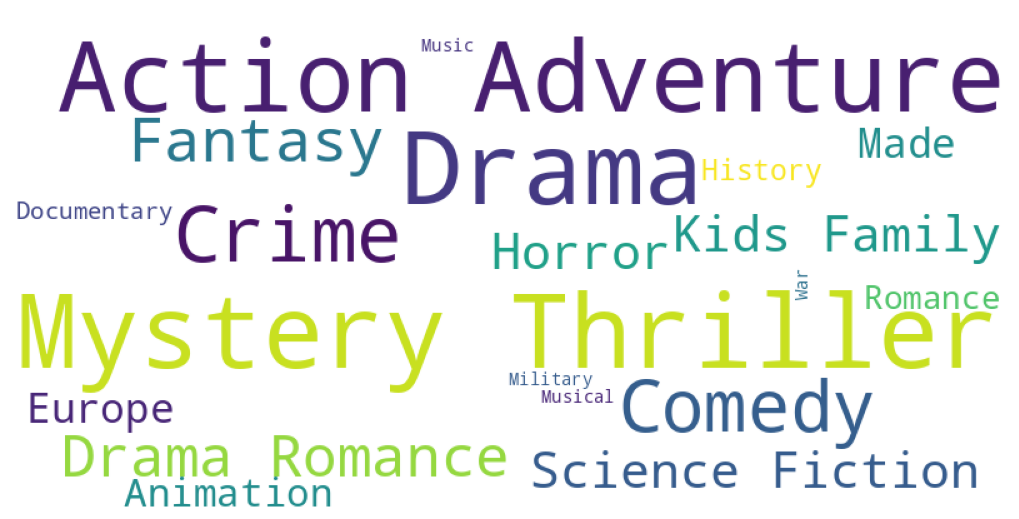

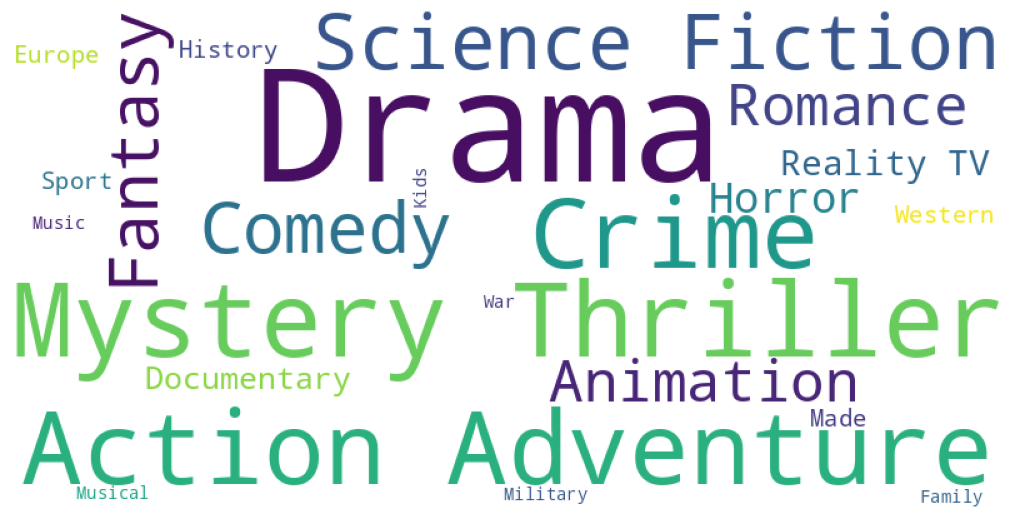

In [88]:
# Install wordcloud library if not already installed
!pip install wordcloud

# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all movie genres into a single string
movie_genres_text = " ".join(df_movie['Genre'])

# Create a WordCloud object
wordcloud_movie = WordCloud(width=800, height=400, background_color="white").generate(movie_genres_text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud_movie)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Combine all tv show genres into a single string
tv_show_genres_text = " ".join(df_tv['Genre'])

# Create a WordCloud object
wordcloud_tv = WordCloud(width=800, height=400, background_color="white").generate(tv_show_genres_text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud_tv)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## **Finding Predominant Streaming Service**

In [89]:
# Assuming df_tv is already created and contains the 'Streaming Service' column

# Analyze the most frequent streaming services for TV shows
print("\nMost Frequent TV Show Streaming Services:")
print(df_tv['Streaming Service'].value_counts())




Most Frequent TV Show Streaming Services:
Streaming Service
amazonprimevideo                                                                                            22
netflix, amazonprimevideo                                                                                   10
amazonprimevideo, amazonprimevideo, amazonprimevideo                                                         8
amazonprimevideo, amazonprimevideo, amazon, amazonprimevideo                                                 7
bookmyshow, amazonprimevideo                                                                                 7
zee5, amazonprimevideo                                                                                       5
hotstar, amazonprimevideo                                                                                    5
amazon, amazon, amazonprimevideo                                                                             4
itunes, amazon, itunes, amazonprimevideo, itunes, b

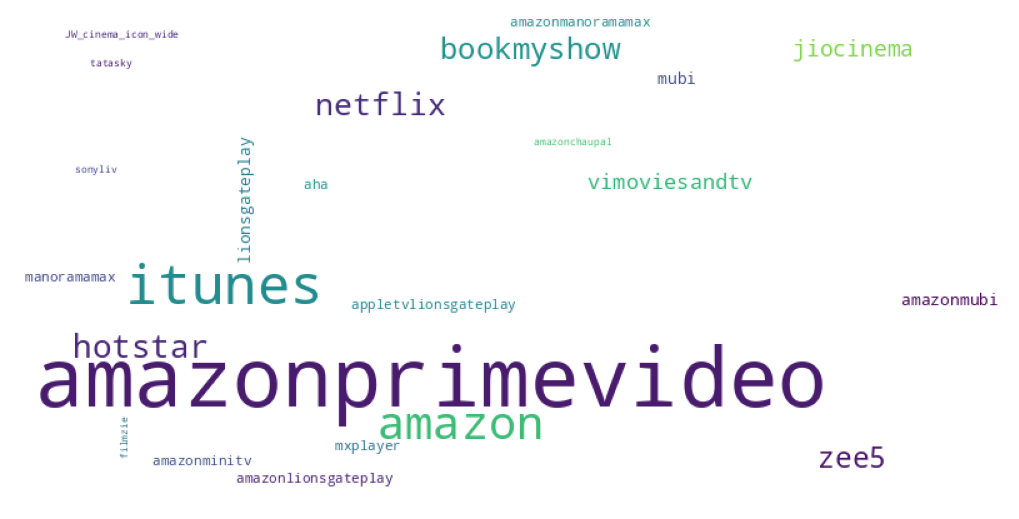

In [90]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

streaming_services_text = " ".join(df_tv['Streaming Service'])
wordcloud_streaming = WordCloud(width=800, height=400, background_color="white").generate(streaming_services_text)

plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud_streaming)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## **Task 3 :- Data Export**

In [91]:
#saving final dataframe as Final Data in csv format
df_tv.to_csv('Final_Data.csv', index=False)


In [92]:
#saving filter data as Filter Data in csv format

filtered_tv_shows.to_csv('Filter_Data.csv', index=False)


# **Dataset Drive Link (View Access with Anyone) -**

In [92]:
https://colab.research.google.com/drive/1o8DOz0vVK3B2jXyCFaAGC-gJmmHvg5iQ?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***